In [340]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [6]:
import os
os.system('dot -Tpng iris_tree.dot -o iris_tree.png')

0

![](iris_tree.png)

In [176]:
%%R
adult<-read.csv(file='../data_sets/adult.txt', stringsAsFactors=TRUE)
levels(adult$marital.status)[2:4] <- "Married"
levels(adult$workclass)[c(2,3,8)] <- "Gov"
levels(adult$workclass)[c(5, 6)] <- "Self"


In [216]:
%%R
adult$age.z <- (adult$age - mean(adult$age))/sd(adult$age)
adult$education.num.z <- (adult$education.num- mean(adult$education.num))/sd(adult$education.num)
adult$capital.gain.z <- (adult$capital.gain - mean(adult$capital.gain))/sd(adult$capital.gain)
adult$capital.loss.z <- (adult$capital.loss - mean(adult$capital.loss))/sd(adult$capital.loss)
adult$hours.per.week.z <- (adult$hours.per.week- mean(adult$hours.per.week))/sd(adult$hours.per.week)

In [221]:
%%R
levels(adult$marital.status); 
#levels(adult$workclass)
library("rpart")
cartfit <- rpart(income ~ age.z + education.num.z + capital.gain.z + capital.loss.z +
hours.per.week.z + race + sex + workclass + marital.status, data = adult, method = "class")
print(cartfit)

n= 25000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 25000 5984 <=50K. (0.76064000 0.23936000)  
   2) marital.status=Divorced,Never-married,Separated,Widowed 13215  845 <=50K. (0.93605751 0.06394249)  
     4) capital.gain.z< 0.8082312 12986  625 <=50K. (0.95187125 0.04812875) *
     5) capital.gain.z>=0.8082312 229    9 >50K. (0.03930131 0.96069869) *
   3) marital.status=Married 11785 5139 <=50K. (0.56393721 0.43606279)  
     6) education.num.z< 0.9458454 8296 2672 <=50K. (0.67791707 0.32208293)  
      12) capital.gain.z< 0.5352109 7894 2280 <=50K. (0.71117304 0.28882696)  
        24) capital.loss.z< 4.254168 7615 2076 <=50K. (0.72738017 0.27261983) *
        25) capital.loss.z>=4.254168 279   75 >50K. (0.26881720 0.73118280) *
      13) capital.gain.z>=0.5352109 402   10 >50K. (0.02487562 0.97512438) *
     7) education.num.z>=0.9458454 3489 1022 >50K. (0.29292061 0.70707939) *


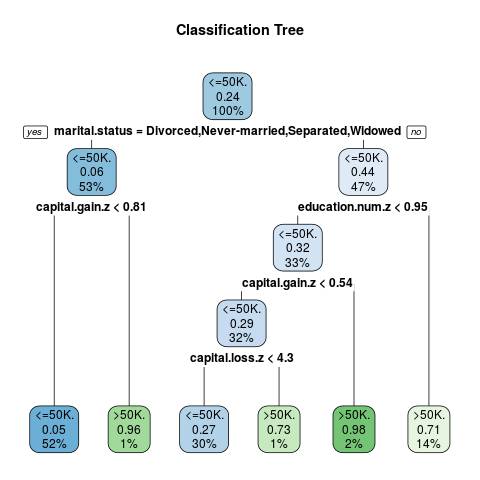

In [222]:
%%R
# Requires package “rpart.plot”
library("rpart.plot")
rpart.plot(cartfit, main = "Classification Tree")

In [350]:
adult = pd.read_csv('../data_sets/adult.txt')
adult = adult[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'race', 'sex', 'workclass', 'marital-status', 'income']]

In [351]:
def merge_categories(df, catsToMerge, newName):
    #if type(df.dtype) != pd.core.dtypes.dtypes.CategoricalDtype:
    #    raise ValueError('type of column is not categorical')
    if len(df.shape) > 1:
        raise ValueError('Dataframe is not single column')
    return pd.Categorical(np.where(df.isin(catsToMerge), newName, df))


In [352]:
#adult['marital-status'] = 

In [353]:
catsToMerge = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
adult['marital-status']=merge_categories(adult['marital-status'], catsToMerge, 'Married')
adult['workclass'] = merge_categories(adult['workclass'], ["Federal-gov", "Local-gov", "State-gov" ], 'Gov')
adult['workclass'] = merge_categories(adult['workclass'], ["Self-emp-not-inc", "Self-emp-inc" ], 'Self')

In [354]:
adult['workclass'].cat.categories

Index(['?', 'Gov', 'Never-worked', 'Private', 'Self', 'Without-pay'], dtype='object')

In [355]:
adult['marital-status'].cat.categories

Index(['Divorced', 'Married', 'Never-married', 'Separated', 'Widowed'], dtype='object')

In [356]:
for column in adult.columns[adult.dtypes == object]:
    adult[column] = pd.Categorical(adult[column])

In [357]:
adult_dummied = pd.get_dummies(adult.drop('income', axis=1))

In [434]:
from sklearn.model_selection import train_test_split
XTrain, XTest, xTrain, yTest = train_test_split(adult_dummied, adult['income']
                                                , test_size=.2)

In [435]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XTrain_z = scaler.fit_transform(XTrain)
XTest_z = scaler.transform(XTest)

In [454]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=4, verbose=1, cv=3)
grid_search_cv.fit(XTrain, yTrain)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 744 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done 882 out of 882 | elapsed:   13.6s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, ve

In [455]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [463]:
from sklearn.metrics import precision_score, recall_score, f1_score
yPred = (grid_search_cv.predict(XTest) == '<=50K.') * 1
print(precision_score((yTest == '<=50K.')*1, yPred))
print(recall_score((yTest == '<=50K.')*1, yPred))
print(f1_score((yTest == '<=50K.')*1, yPred))

0.7608
1.0
0.8641526578827805


In [465]:
from sklearn.metrics import precision_score, recall_score, f1_score
yPred = (grid_search_cv.predict(XTrain) == '<=50K.') * 1
print(precision_score((yTrain == '<=50K.')*1, yPred))
print(recall_score((yTrain == '<=50K.')*1, yPred))
print(f1_score((yTrain == '<=50K.')*1, yPred))

0.762
1.0
0.8649262202043133


In [470]:
from sklearn.metrics import roc_curve
y_proba_tree = grid_search_cv.predict_proba(XTrain)
y_scores_tree = y_proba_tree[:, 1]
fpr_tree, tpr_tree, threshold_tree = roc_curve((yTrain == '<=50K.')*1, y_scores_tree)

In [471]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

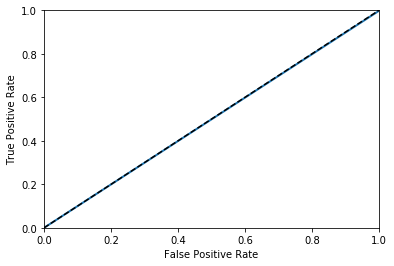

In [472]:
plot_roc_curve(fpr_tree, tpr_tree)

/home/bzr0014/envs/AI/lib/python3.5/site-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


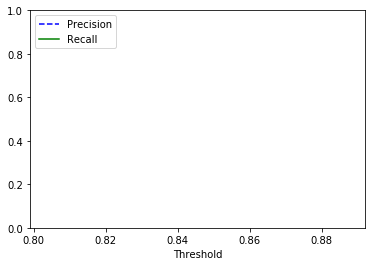

In [469]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve((yTrain == '<=50K.')*0, y_scores_tree)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)